In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from imutils.contours import sort_contours
import imutils
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import Adam
from keras.preprocessing import image_dataset_from_directory

In [3]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_ds = image_dataset_from_directory(
directory ='Data',
image_size = (28, 28),
validation_split = validation_split,
subset = "training",
seed = seed_train_validation,
color_mode = 'grayscale',
shuffle = shuffle_value)

val_ds = image_dataset_from_directory(
directory ='Data',
image_size = (28, 28),
validation_split = validation_split,
subset = "validation",
seed = seed_train_validation,
color_mode = 'grayscale',
shuffle = shuffle_value)

Found 333897 files belonging to 16 classes.
Using 267118 files for training.
Found 333897 files belonging to 16 classes.
Using 66779 files for validation.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 256)               8

In [59]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [60]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
 652/8348 [=>............................] - ETA: 1:15 - loss: 0.0712 - accuracy: 0.9815

KeyboardInterrupt: 

In [14]:
model.save('my_model_v1.keras')

In [6]:
model.load_weights("my_model_v1.keras")

In [7]:
labels = train_ds.class_names
labels_dict =  dict(enumerate(labels))
labels_dict


{0: '%',
 1: '*',
 2: '+',
 3: '-',
 4: '0',
 5: '1',
 6: '2',
 7: '3',
 8: '4',
 9: '5',
 10: '6',
 11: '7',
 12: '8',
 13: '9',
 14: '[',
 15: ']'}

In [54]:
labels

['%',
 '*',
 '+',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '[',
 ']']

In [8]:
def make_prediction(img):
    img = np.expand_dims(img, axis=0)  # Reshape for the model
    # Predict
    prediction = model.predict(img)
    pred_class = np.argmax(prediction, axis=1)
    return labels_dict[pred_class[0]]
    

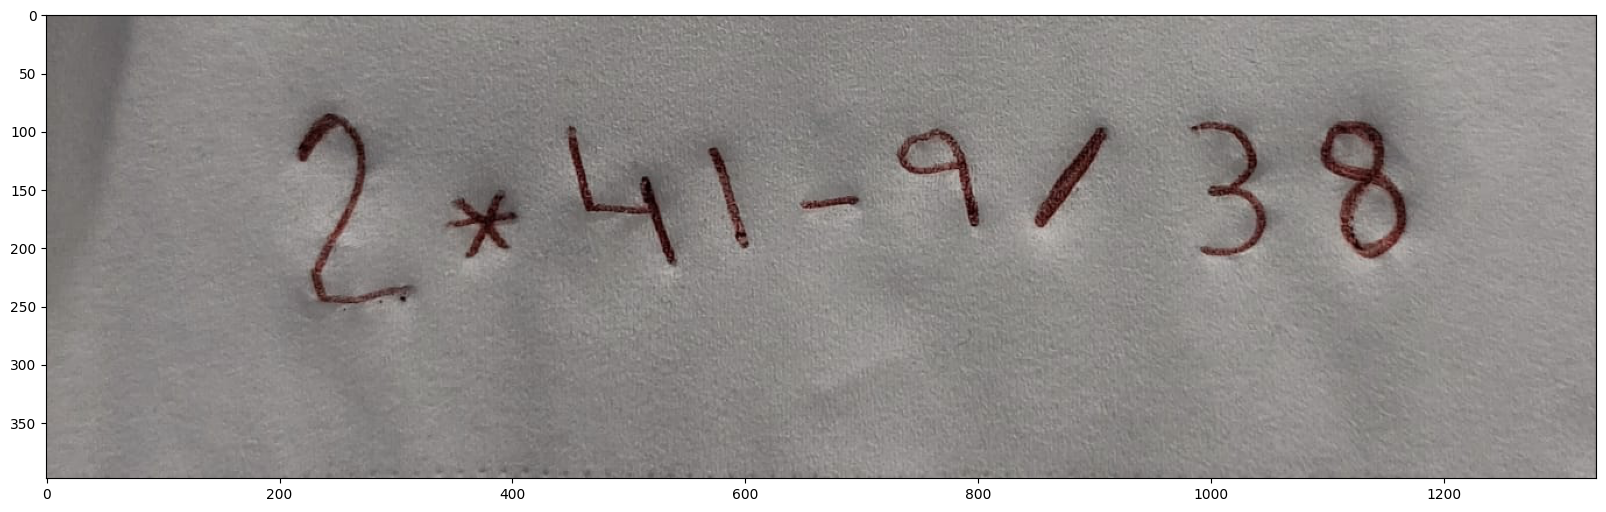

In [15]:
import cv2

# Load the image
image = cv2.imread('img_3.png')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(image)


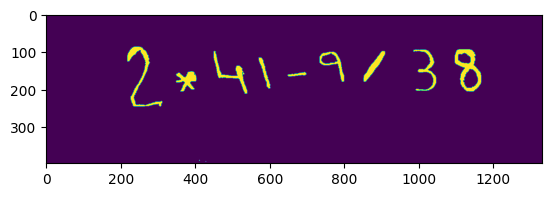

In [29]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur for noise reduction
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Binarize the image
_, binary_image = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(binary_image)

In [34]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sort_contours(contours, method="left-to-right")[0]

chars = []
result = []

for contour in contours:
    # Get bounding box for each contour
    x, y, w, h = cv2.boundingRect(contour)
    if w*h>1200:

      # Extract and resize character
      char_image = binary_image[y:y+h+10, x:x+w+10]
      char_image = cv2.resize(char_image, (28, 28))
      # eroded_image = cv2.erode(char_image, (3, 3), iterations=1)

      chars.append(~char_image)
      result.append(make_prediction(~char_image))
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)


1/1 [==============================] - 0s 8ms/step


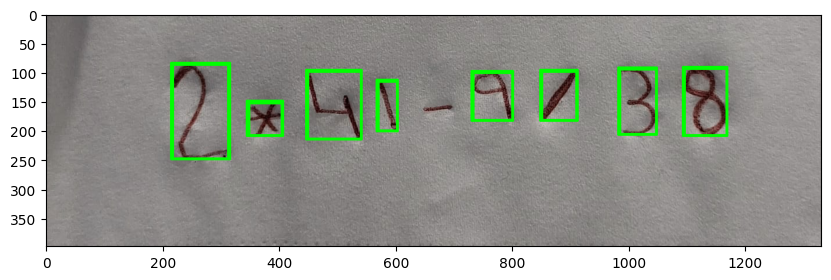

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(image)

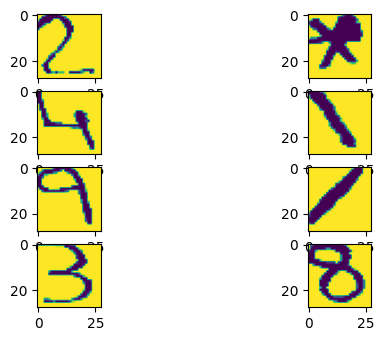

In [36]:
for i, img in enumerate(chars):
    plt.subplot(int(len(chars) / 2 + 1), 2, i + 1)
    plt.imshow(img)

In [37]:
result

['2', '*', '4', '-', '9', '%', '3', '8']

In [129]:
test = cv2.imread("Data/2/2_1_8ccw_6.png")

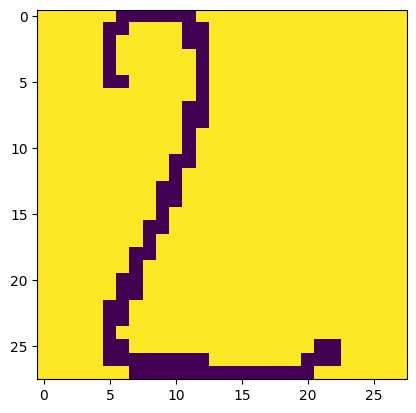

In [130]:
gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)


In [131]:
make_prediction(gray)

1/1 [==============================] - 0s 20ms/step


'2'

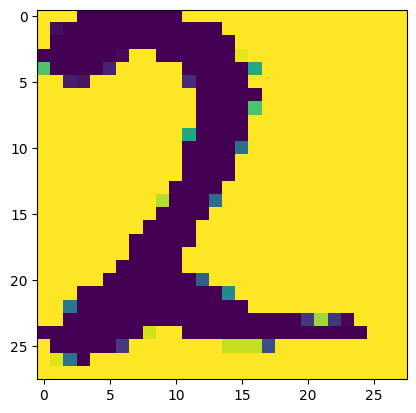

In [221]:
plt.imshow(chars[-3])

In [44]:
import numexpr as ner

In [45]:
''.join(result).replace("%", "/")

'2*4-9/38'

In [51]:
float(ner.evaluate(''.join(result).replace("%", "/")).squeeze())

7.7631578947368425

In [53]:
ner.evaluate('3+4')

array(7, dtype=int32)